# IMPORTING THE DATASET

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\DataVision\Cleaned_Data\Updated_data.csv")
data1 = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\DataVision\Cleaned_Data\Updated_data_without_categorical_encoding.csv")

In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date

In [8]:
data[data['intersection_name'] == "Chowk"]

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,is_weekend,hour_of_day,is_holiday_or_special_event,date
2,673.0,2023-01-01 11:10:00,3.0,Chowk,25.4314,81.8437,20.0,53.28,120.0,69.000000,5.0,46.0,0,7,1.0,4,0.34,15.0,1.0,2.0,2.0,1,11,1,2023-01-01
6,3503.0,2023-01-03 10:20:00,3.0,Chowk,25.4314,81.8437,133.0,23.87,120.0,63.848118,6.0,47.0,4,2,0.0,4,2.78,77.0,16.0,12.0,28.0,0,10,0,2023-01-03
14,6403.0,2023-01-05 10:40:00,3.0,Chowk,25.4314,81.8437,74.0,40.46,120.0,60.000000,5.0,55.0,0,4,1.0,4,1.37,38.0,5.0,9.0,22.0,0,10,1,2023-01-05
27,1356.0,2023-01-06 20:30:00,3.0,Chowk,25.4314,81.8437,189.0,22.70,120.0,81.000000,6.0,33.0,5,5,0.0,1,3.61,121.0,18.0,16.0,34.0,0,20,1,2023-01-06
37,4173.0,2023-01-03 21:30:00,3.0,Chowk,25.4314,81.8437,95.0,36.14,120.0,57.000000,4.0,59.0,0,2,0.0,4,1.94,60.0,11.0,8.0,16.0,0,21,0,2023-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,1113.0,2023-01-01 18:30:00,3.0,Chowk,25.4314,81.8437,73.0,35.29,120.0,50.000000,6.0,64.0,3,7,1.0,4,1.25,43.0,7.0,3.0,20.0,1,18,1,2023-01-01
9952,433.0,2023-01-01 07:10:00,3.0,Chowk,25.4314,81.8437,76.0,38.88,120.0,59.000000,5.0,56.0,0,7,1.0,4,1.47,49.0,9.0,4.0,14.0,1,7,1,2023-01-01
9959,1653.0,2023-01-02 03:30:00,3.0,Chowk,25.4314,81.8437,72.0,40.02,120.0,60.000000,3.0,57.0,0,1,0.0,4,0.94,44.0,3.0,2.0,23.0,0,3,0,2023-01-02
9963,5803.0,2023-01-05 00:40:00,3.0,Chowk,25.4314,81.8437,73.0,39.75,120.0,60.000000,3.0,57.0,0,4,1.0,4,1.40,45.0,6.0,8.0,14.0,0,0,1,2023-01-05


# Aggregate Data

In [9]:
total_vehicles_per_day = data.groupby(['intersection_name','date'])['vehicle_count'].sum().reset_index()
total_vehicles_per_day

,intersection_name,date,vehicle_count
0,Allahabad Junction,2023-01-01,9353.667331
1,Allahabad Junction,2023-01-02,19631.000000
2,Allahabad Junction,2023-01-03,18669.333665
3,Allahabad Junction,2023-01-04,18868.000000
4,Allahabad Junction,2023-01-05,11062.000000
...,...,...,...
65,Tagore Town,2023-01-03,19016.326326
66,Tagore Town,2023-01-04,18707.326326
67,Tagore Town,2023-01-05,11009.163163
68,Tagore Town,2023-01-06,21345.000000


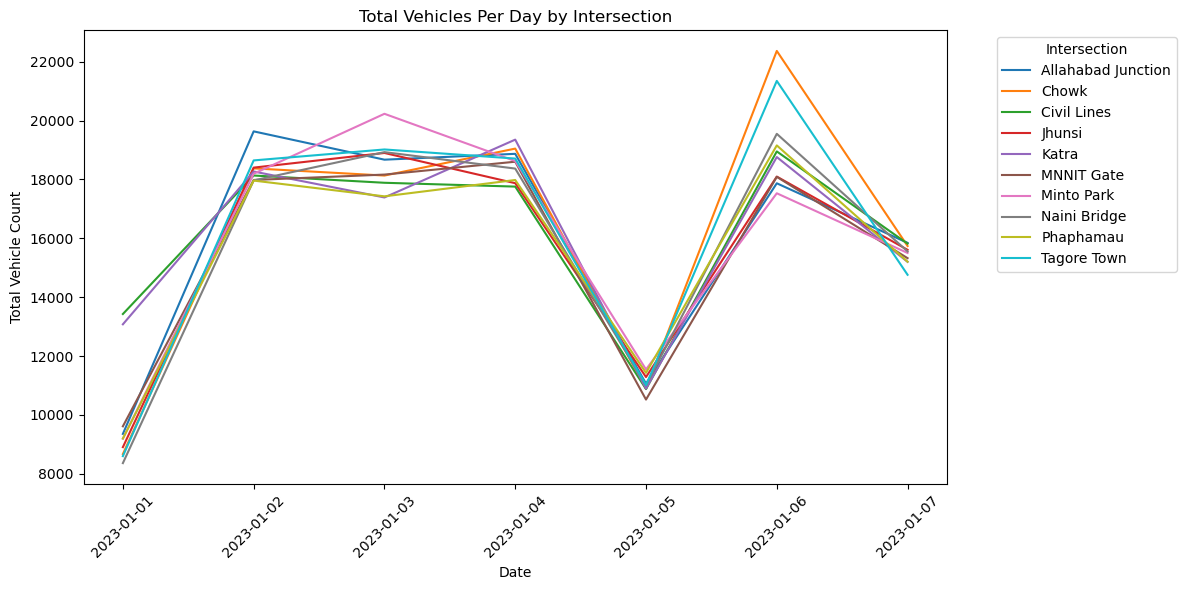

In [10]:
plt.figure(figsize=(12, 6))

for intersection in total_vehicles_per_day['intersection_name'].unique():
    intersection_data = total_vehicles_per_day[total_vehicles_per_day['intersection_name'] == intersection]
    plt.plot(intersection_data['date'], intersection_data['vehicle_count'], label=intersection)

plt.xlabel('Date')
plt.ylabel('Total Vehicle Count')
plt.title('Total Vehicles Per Day by Intersection')
plt.legend(title='Intersection', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [11]:
average_vehicle_count_per_hour = data.groupby(['intersection_name', 'hour_of_day'])['vehicle_count'].mean().reset_index()
average_vehicle_count_per_hour

,intersection_name,hour_of_day,vehicle_count
0,Allahabad Junction,0,80.414634
1,Allahabad Junction,1,81.833333
2,Allahabad Junction,2,81.928571
3,Allahabad Junction,3,83.698421
4,Allahabad Junction,4,77.829268
...,...,...,...
235,Tagore Town,19,185.170732
236,Tagore Town,20,174.789599
237,Tagore Town,21,76.071429
238,Tagore Town,22,76.809524


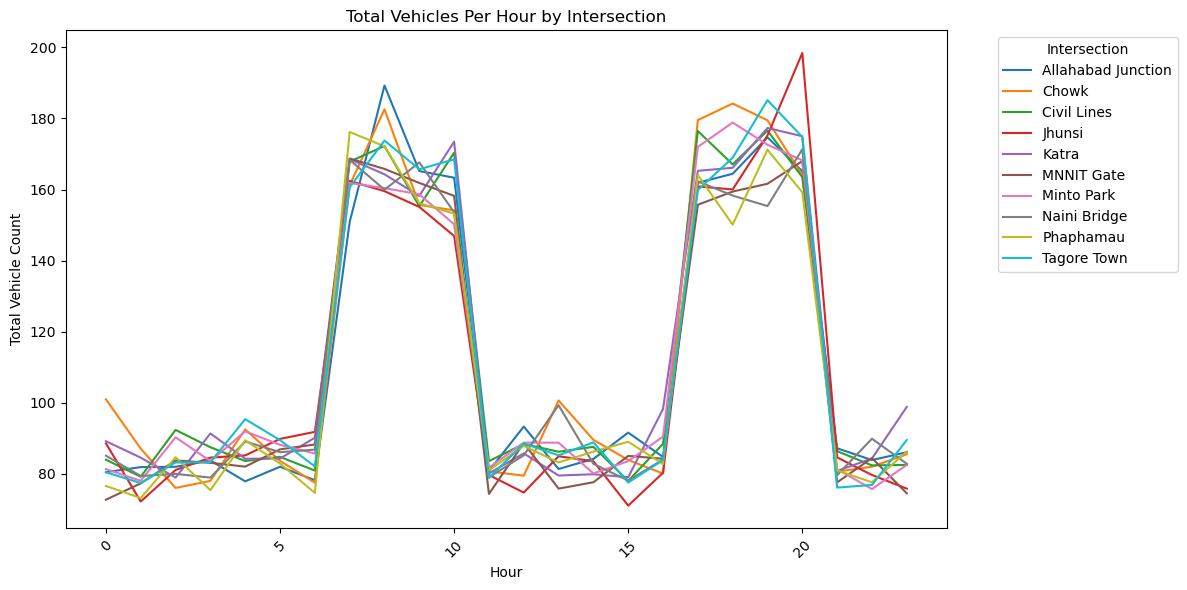

In [12]:
plt.figure(figsize=(12, 6))

for intersection in average_vehicle_count_per_hour['intersection_name'].unique():
    intersection_data = average_vehicle_count_per_hour[average_vehicle_count_per_hour['intersection_name'] == intersection]
    plt.plot(intersection_data['hour_of_day'], intersection_data['vehicle_count'], label=intersection)

plt.xlabel('Hour')
plt.ylabel('Total Vehicle Count')
plt.title('Total Vehicles Per Hour by Intersection')
plt.legend(title='Intersection', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Filter Data

In [9]:
data1[(data1['weather_condition'] =='Heavy Rain') | (data1['weather_condition'] =='Light Rain')]

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,hour_of_day,is_holiday_or_special_event
3,8744.0,2023-01-07 01:40:00,4.0,Tagore Town,25.4675,81.8867,21.0,36.060000,120.0,59.000000,4.0,57.000000,Heavy Rain,Saturday,0.0,unknown,0.54,12.0,4.0,2.0,3.0,1,Regular Day
6,3503.0,2023-01-03 10:20:00,3.0,Chowk,25.4314,81.8437,133.0,23.870000,120.0,63.848118,6.0,47.000000,Heavy Rain,Tuesday,0.0,unknown,2.78,77.0,16.0,12.0,28.0,10,Regular Day
8,2955.0,2023-01-03 01:10:00,5.0,Naini Bridge,25.4088,25.4088,32.0,30.790000,120.0,60.000000,5.0,55.000000,Heavy Rain,Tuesday,0.0,unknown,0.77,19.0,4.0,5.0,4.0,1,Regular Day
12,4361.0,2023-01-04 00:40:00,1.0,Civil Lines,25.4486,81.8333,92.0,32.070000,120.0,57.000000,4.0,59.000000,Light Rain,Wednesday,0.0,unknown,1.99,56.0,9.0,13.0,14.0,0,Regular Day
21,8230.0,2023-01-06 17:00:00,10.0,Minto Park,25.4352,81.8820,207.0,24.580000,120.0,81.000000,4.0,51.653939,Light Rain,Friday,0.0,unknown,4.29,125.0,24.0,19.0,39.0,17,Regular Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9948,6723.0,2023-01-05 16:00:00,3.0,Chowk,25.4314,81.8437,52.0,39.660000,120.0,54.000000,5.0,61.000000,Light Rain,Thursday,1.0,unknown,1.27,24.0,9.0,5.0,14.0,16,Special Day/Holiday
9964,9933.0,2023-01-07 21:30:00,3.0,Chowk,25.4314,81.8437,69.0,26.260000,120.0,60.000000,6.0,54.000000,Heavy Rain,Saturday,0.0,unknown,1.40,44.0,7.0,7.0,11.0,21,Regular Day
9966,5280.0,2023-01-04 15:50:00,10.0,Minto Park,25.4352,81.8820,109.0,27.230000,120.0,60.000000,4.0,56.000000,Light Rain,Wednesday,0.0,unknown,2.72,59.0,14.0,19.0,17.0,15,Regular Day
9968,6728.0,2023-01-05 16:00:00,8.0,Jhunsi,25.4326,81.9061,73.0,33.610134,120.0,66.000000,3.0,51.000000,Light Rain,Thursday,1.0,unknown,1.58,43.0,10.0,6.0,14.0,16,Special Day/Holiday


In [10]:
data1[(data1['day_of_week'] =='Saturday') | (data1['day_of_week'] =='Sunday')]

,record_id,timestamp,intersection_id,intersection_name,latitude,longitude,vehicle_count,average_speed,signal_cycle_time,green_time,yellow_time,red_time,weather_condition,day_of_week,is_holiday,event,pollution_level,car_count,bus_count,truck_count,motorcycle_count,hour_of_day,is_holiday_or_special_event
0,9926.0,2023-01-07 21:20:00,6.0,Allahabad Junction,25.4358,81.8307,75.0,39.72,120.0,63.000000,4.0,53.0,Clear,Saturday,0.0,unknown,1.21,48.0,4.0,6.0,17.0,21,Regular Day
2,673.0,2023-01-01 11:10:00,3.0,Chowk,25.4314,81.8437,20.0,53.28,120.0,69.000000,5.0,46.0,Clear,Sunday,1.0,unknown,0.34,15.0,1.0,2.0,2.0,11,Special Day/Holiday
3,8744.0,2023-01-07 01:40:00,4.0,Tagore Town,25.4675,81.8867,21.0,36.06,120.0,59.000000,4.0,57.0,Heavy Rain,Saturday,0.0,unknown,0.54,12.0,4.0,2.0,3.0,1,Regular Day
4,316.0,2023-01-01 05:10:00,6.0,Allahabad Junction,25.4358,81.8307,41.0,47.21,120.0,63.848118,5.0,54.0,Clear,Sunday,1.0,unknown,0.86,26.0,6.0,2.0,7.0,5,Special Day/Holiday
5,1092.0,2023-01-01 18:10:00,2.0,Katra,25.4550,81.8463,177.0,24.71,120.0,77.000000,5.0,38.0,Clear,Sunday,1.0,New Year Celebration,3.46,111.0,18.0,15.0,33.0,18,Special Day/Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,34.0,2023-01-01 00:30:00,4.0,Tagore Town,25.4675,81.8867,65.0,38.97,120.0,65.000000,6.0,49.0,Clear,Sunday,1.0,unknown,1.14,39.0,5.0,5.0,16.0,0,Special Day/Holiday
9956,8688.0,2023-01-07 00:40:00,8.0,Jhunsi,25.4326,81.9061,65.0,38.61,120.0,65.000000,4.0,51.0,Clear,Saturday,0.0,unknown,1.56,35.0,12.0,4.0,14.0,0,Regular Day
9964,9933.0,2023-01-07 21:30:00,3.0,Chowk,25.4314,81.8437,69.0,26.26,120.0,60.000000,6.0,54.0,Heavy Rain,Saturday,0.0,unknown,1.40,44.0,7.0,7.0,11.0,21,Regular Day
9970,9516.0,2023-01-07 14:30:00,6.0,Allahabad Junction,25.4358,81.8307,75.0,40.61,120.0,60.000000,6.0,54.0,Clear,Saturday,0.0,unknown,1.57,43.0,7.0,10.0,15.0,14,Regular Day


# Group Data

In [11]:
average_speed_per_intersection = data.groupby('intersection_name')['average_speed'].mean().reset_index()
average_speed_per_intersection = average_speed_per_intersection.sort_values(by='average_speed',ascending= True)
average_speed_per_intersection

,intersection_name,average_speed
6,Minto Park,32.903907
2,Civil Lines,32.953631
1,Chowk,33.352563
4,Katra,33.658370
9,Tagore Town,33.761492
3,Jhunsi,33.764027
0,Allahabad Junction,33.788919
8,Phaphamau,33.866212
7,Naini Bridge,33.914554
5,MNNIT Gate,34.131518


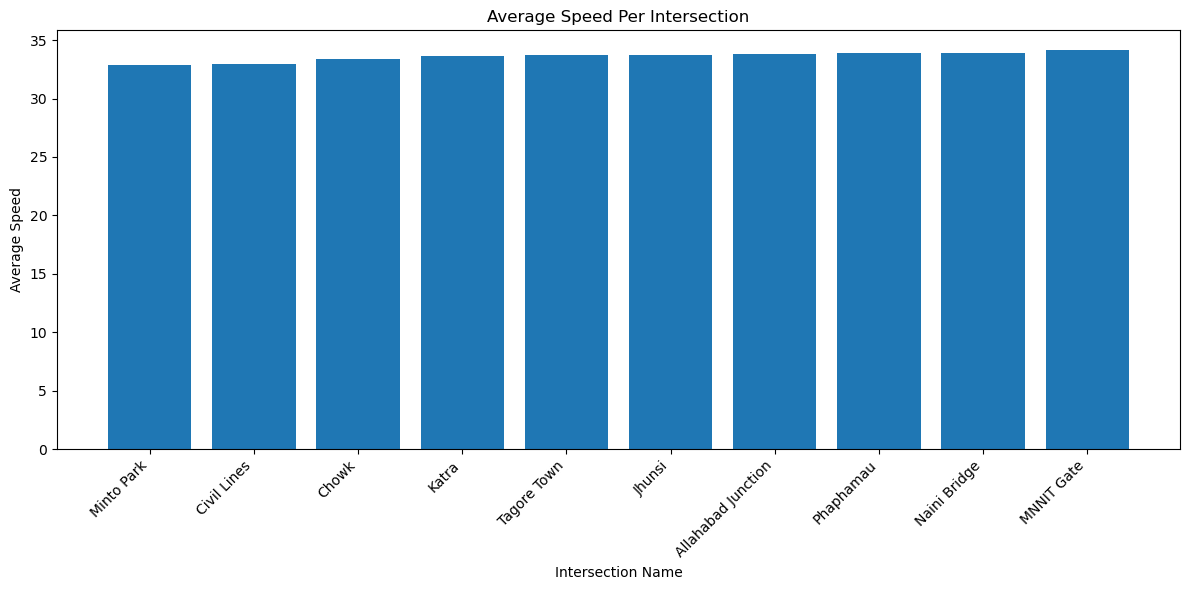

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(average_speed_per_intersection['intersection_name'], average_speed_per_intersection['average_speed'])

plt.xlabel('Intersection Name')
plt.ylabel('Average Speed')
plt.title('Average Speed Per Intersection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
vehcile_count_per_intersection = data.groupby('intersection_name')['vehicle_count'].mean().reset_index()
vehcile_count_per_intersection = vehcile_count_per_intersection.sort_values(by='vehicle_count', ascending=True)
vehcile_count_per_intersection

,intersection_name,vehicle_count
5,MNNIT Gate,108.067864
8,Phaphamau,108.889525
3,Jhunsi,109.495850
7,Naini Bridge,110.054288
6,Minto Park,111.249098
0,Allahabad Junction,111.518371
9,Tagore Town,112.191660
2,Civil Lines,112.838940
4,Katra,113.040614
1,Chowk,113.317896


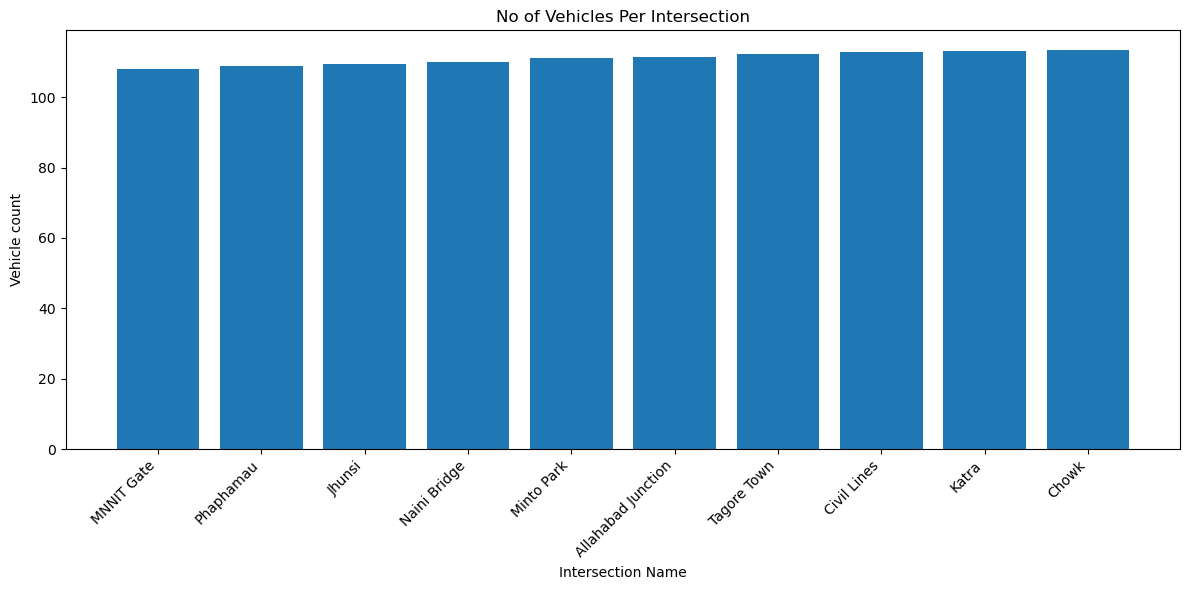

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(vehcile_count_per_intersection['intersection_name'], vehcile_count_per_intersection['vehicle_count'])

plt.xlabel('Intersection Name')
plt.ylabel("Vehicle count")
plt.title('No of Vehicles Per Intersection')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()